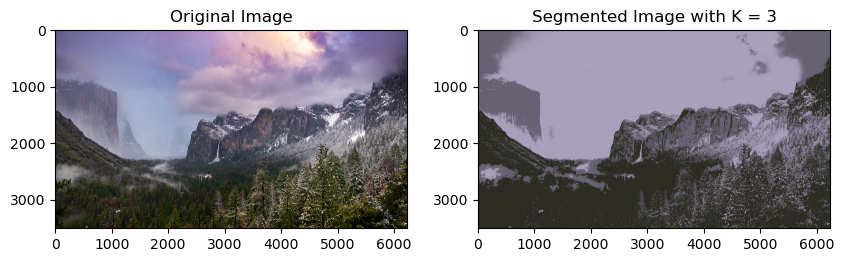

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the image
image = cv2.imread("C:\\Users\\saeem\\OneDrive\\Pictures\\Saved Pictures\\kellen-riggin-bBGpZ63zNi0-unsplash.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels and 3 color values (RGB)
pixels = image.reshape((-1, 3))

# Convert to float
pixels = np.float32(pixels)

# Define criteria, number of clusters (K), and apply KMeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(pixels)

# Get the cluster centers and labels
centers = np.uint8(kmeans.cluster_centers_)
labels = kmeans.labels_

# Map the labels to the original image shape
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title('Segmented Image with K = %d' % k)
plt.imshow(segmented_image)
plt.show()
